# Chatbot Intent Classification (Text Classification)

### Liraries Used:

* PorterStemmer
* one_hot representation : from tensorflow.keras.preprocessing.text import one_hot
* Embedding representation : from tensorflow.keras.preprocessing.sequence import pad_sequences
* KFold : Cross Validation
* Kearas : Embedding , Dense , LSTM


In [63]:
import pandas as pd
import numpy as np

In [64]:
df = pd.read_csv("GCO-train-data.csv")
df.head()

,text,intent,entity_name,entity_value,entity_start_index,entity_class,sentiment,refund_exists
0,Hi I have a flight booked on I think American ...,AMENITIES,{product}|{airAmenity},flight|car,12|137,FLIGHT|OTHER,neutral,NaN
1,I didn t even get to sit in my paid seats,AMENITIES,{airAmenity}|{airAmenity},sit|seats,21|36,SEAT|SEAT,negative,NaN
2,Hi there I'm wondering if you could help me wi...,AMENITIES,NaN,NaN,NaN,NaN,neutral,NaN
3,Hi carrie how are you.. I just want to know fo...,AMENITIES,{airAmenity},baggage,67,BAG,neutral,NaN
4,"Hi, I booked airline tickets for NUM adults wi...",AMENITIES,{airAmenity}|{airAmenity}|{airAmenity}|{airAme...,airline|tickets|airline|baggage|airline|carry ...,13|21|13|184|13|219|232,OTHER|BOARDING_PASS|OTHER|BAG|OTHER|BAG|CHECK_IN,neutral,NaN


### Checking Null Values

In [65]:
print(df.shape)
df.loc[: ,['text' ,'intent']].isnull().sum()

(74178, 8)


text      0
intent    0
dtype: int64

### Visualize distribution of Intent Categories

In [66]:
print(df['intent'].value_counts())
print(df['intent'].unique())

AMENITIES                               16139
BILLING_REWARDS                         15695
CANCEL_RELATED_INTENT_IDENTIFICATION    14832
CHANGE                                  12840
BOOKING_CONFIRMATION                    12019
UNKNOWN_SCENARIO                         1495
SPEAK_TO_AGENT                            963
ST_HELLO                                   54
ACCEPT_UTILITY                             51
DECLINE_UTILITY                            37
ST_GOODBYE                                 30
ST_ABOUTUS                                 23
Name: intent, dtype: int64
['AMENITIES' 'BOOKING_CONFIRMATION' 'ST_HELLO' 'SPEAK_TO_AGENT'
 'CANCEL_RELATED_INTENT_IDENTIFICATION' 'BILLING_REWARDS' 'CHANGE'
 'UNKNOWN_SCENARIO' 'ACCEPT_UTILITY' 'ST_ABOUTUS' 'DECLINE_UTILITY'
 'ST_GOODBYE']


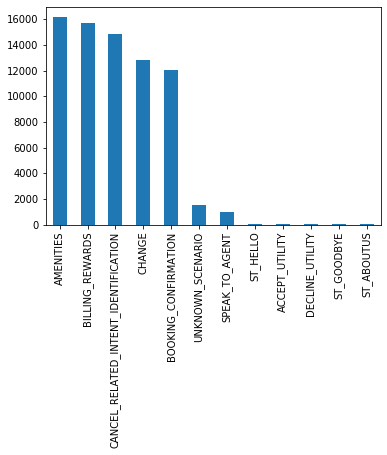

In [67]:
df['intent'].value_counts().plot(kind ='bar')

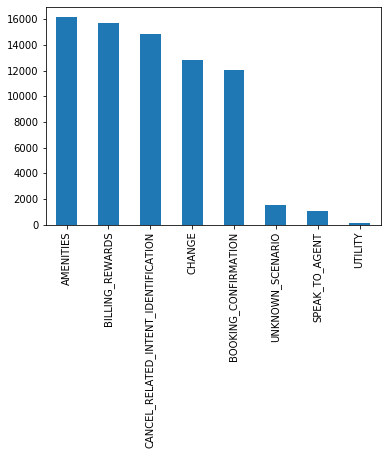

In [72]:
for i in list(range(len(df))):
    if( df['intent'][i] == 'ST_HELLO' or  df['intent'][i] == 'ST_GOODBYE' or df['intent'][i] == 'ST_ABOUTUS' or
        df['intent'][i] == 'ACCEPT_UTILITY' or df['intent'][i] == 'DECLINE_UTILITY' ):
        df['intent'][i] = 'SPEAK_TO_AGENT'
    
    elif():
        df['intent'][i] = 'UTILITY'
df['intent'].value_counts().plot(kind ='bar')

## Encoding of Target variable 'intent'

In [73]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['intent'] = encoder.fit_transform(df['intent'])

## Data Preprocessing

In [74]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [76]:
ps = PorterStemmer()
corpus = []

for i in range(0 ,len(df)):
    text = re.sub( '[^a-zA-Z]' ,' ' ,df['text'][i])
    text = text.lower()
    text = text.split()
    
    text = [ ps.stem(w)  for w in text if not w in stopwords.words("english") ]
    text = ' '.join(text)
    corpus.append(text)
#print(corpus)

##  OneHot Representation

Onehot gives the index based on vocabulory sizeAppying CountVectorizer

In [77]:
from tensorflow.keras.preprocessing.text import one_hot

voc_size =5000
# voc_size =5000 we have defined 
onehot_rep = [ one_hot(words ,voc_size) for words in corpus]
onehot_rep

[[3743,
  3474,
  3397,
  4483,
  1085,
  4989,
  813,
  1439,
  2901,
  254,
  254,
  2203,
  4096,
  1762,
  1762,
  3425,
  3534,
  935,
  254,
  4869],
 [4734, 2299, 4941, 9, 1283],
 [3743, 4047, 4050, 361, 4909],
 [3743, 739, 1669, 252, 3837, 3447, 3759, 1551, 922, 4989, 4926, 4989],
 [3743,
  3397,
  4989,
  594,
  254,
  314,
  4980,
  4765,
  59,
  201,
  474,
  1737,
  4765,
  3004,
  59,
  201,
  474,
  187,
  4989,
  1669,
  252,
  3837,
  3759,
  3537,
  4989,
  739,
  4553],
 [658, 571, 3721, 1283, 2492, 252, 4015, 1283, 3851, 1841, 2239, 1283, 4204],
 [3743,
  905,
  4700,
  1321,
  2032,
  254,
  1669,
  252,
  571,
  4941,
  4003,
  1356,
  2910,
  1283],
 [4904, 2922, 715, 1274, 1509, 3680, 3397, 3474, 4909, 1439, 3759, 2656],
 [4963, 2922, 538, 149, 541, 1669, 893, 2363, 80],
 [2862, 2032, 484, 3199, 3970, 648, 4052, 3967],
 [116, 548, 949, 1283, 4553, 877, 3776, 4050, 1745, 949, 1283],
 [4116, 1235, 1759, 4024, 1283, 4553],
 [2595, 1566, 3632, 3123, 577, 588, 558, 89

## EMbedding Regresentation

Since all sentences have diffrent length we should do pad sequencing
* pad_sequences : append 0's to make all sent of fixed size
* First param should be onehot_rep
* padding='pre' --> append before text

In [78]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sent_len=20

embed_doc = pad_sequences( onehot_rep , padding='pre' , maxlen = sent_len)
print(embed_doc)
print("Length : " ,len(embed_doc))

[[3743 3474 3397 ...  935  254 4869]
 [   0    0    0 ... 4941    9 1283]
 [   0    0    0 ... 4050  361 4909]
 ...
 [   0    0    0 ... 4031  361  976]
 [   0    0    0 ... 4031  361 3474]
 [   0    0    0 ... 4031  361  976]]
Length :  74178


## Define Train ,Test

In [94]:
X = np.array( embed_doc )
y = df['intent']

from sklearn.model_selection import train_test_split as tts

X_train ,X_test ,y_train ,y_test = tts (X ,y , test_size=0.33 ,random_state=10)

In [95]:
from sklearn.model_selection import KFold

kf = KFold( n_splits=10 , shuffle= True , random_state=10)

for train_index , test_index in kf.split(X):
    X_train ,X_test = X[train_index],X[test_index]
    y_train ,y_test = y[train_index] ,y[test_index]

# Modelling

In [91]:
import tensorflow as tf

from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from tensorflow.keras.models import Sequential

* Loss Funs: categorical_crossentropy : for binary target values
* Dense o/p layer : Mention the number of target categories (Here intent have 12 categories of data)


In [92]:
embedding_vec_features = 40

model = Sequential()
model.add(Embedding(voc_size ,embedding_vec_features, input_length= sent_len))
model.add(LSTM(100))
model.add(Dense(12 , activation='softmax' ))

model.compile(loss='sparse_categorical_crossentropy' , optimizer= 'adam' ,metrics=['accuracy'])
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 20, 40)            200000    
_________________________________________________________________
lstm_10 (LSTM)               (None, 100)               56400     
_________________________________________________________________
dense_10 (Dense)             (None, 12)                1212      
Total params: 257,612
Trainable params: 257,612
Non-trainable params: 0
_________________________________________________________________
None


## Model Training

In [93]:
model.fit(X_train , y_train , validation_data=(X_test ,y_test),
         epochs=10 ,batch_size=64)

Train on 66761 samples, validate on 7417 samples
Epoch 1/10
66761/66761 [==============================] - 54s 814us/sample - loss: 0.5310 - accuracy: 0.8266 - val_loss: 0.2816 - val_accuracy: 0.9221
Epoch 2/10
66761/66761 [==============================] - 48s 724us/sample - loss: 0.2178 - accuracy: 0.9314 - val_loss: 0.2189 - val_accuracy: 0.9310
Epoch 3/10
66761/66761 [==============================] - 48s 724us/sample - loss: 0.1667 - accuracy: 0.9467 - val_loss: 0.1907 - val_accuracy: 0.9403
Epoch 4/10
66761/66761 [==============================] - 51s 759us/sample - loss: 0.1384 - accuracy: 0.9553 - val_loss: 0.1858 - val_accuracy: 0.9420
Epoch 5/10
66761/66761 [==============================] - 51s 757us/sample - loss: 0.1216 - accuracy: 0.9602 - val_loss: 0.1935 - val_accuracy: 0.9396
Epoch 6/10
66761/66761 [==============================] - 48s 712us/sample - loss: 0.1112 - accuracy: 0.9643 - val_loss: 0.1994 - val_accuracy: 0.9404
Epoch 7/10
66761/66761 [=====================

## Performance Metrics & Accuracy

In [96]:
y_pred = model.predict_classes(X_test)

In [97]:
from sklearn.metrics import confusion_matrix ,accuracy_score

score = round(accuracy_score(y_test ,y_pred),2)*100
print("================ LSTM Accuracy : {}% ===============".format(score))
#print( confusion_matrix(y_test ,y_pred))


================ LSTM Accuracy : 94.0% ===============
